# SLR + SLC + USL Mini Project

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from statsmodels.api import add_constant,OLS,Logit
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.metrics import r2_score,classification_report,roc_curve
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Section A: Regression

**Problem:**

Restaurants from all over the world can be found here in Bengaluru. From the United States 
to Japan, Russia to Antarctica, you get all types of cuisines here. Delivery, Dine-out, Pubs, 
Bars, Drinks, Buffet, Desserts you name it and Bengaluru has it. Bengaluru is the best place 
for foodies. The number of restaurants is increasing day by day. Currently, it stands at 
approximately 12,000 restaurants. With such a high number of restaurants. This industry 
hasn't been saturated yet. And new restaurants are opening every day. However, it has 
become difficult for them to compete with already established restaurants. The key issues 
that continue to pose a challenge to them include high real estate costs, rising food costs, 
shortage of quality manpower, fragmented supply chain, and over-licensing. 

**Objective:**

The newly started companies are not able to decide the cost that would happen per 
two people for once. So the Zomato company has a good analyst team who can predict the 
cost per two customers for one time so that the newly started restaurants and upcoming 
restaurants will be well prepared how the restaurant should invest in improving the 
ambiance and all other stuff to attract the customers. Assume you are the analyst team that 
Zomato has organized to help new and upcoming restaurants by letting them know the 
various reasons that customers look for and build a model which able to predict the cost for 
two people.

#### Reading the Data

In [2]:
d=pd.read_csv('zomato.csv')
d.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


### Checking Data Types

In [3]:
d.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

We can see that the 'rate' and 'approx_cost(for two people)' variables are wrongly identified as object datatype despite being numerical columns. We shall find out the reasons for that below.

In [4]:
d.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

The 'rate' variable has '/' and spaces present in the values as well as 'NEW' or '-' as some values. We shall remove the symbols and replace 'NEW' and '-' values with NaN.

In [5]:
# cleaning of 'rate'

# function replaces all 'NEW' and '-' values with null so that we can handle them easily
# function also removes the '/' part to change the value into float
def clean_rate(val):
    if val == "NEW" or val == "-":
        return np.nan
    else:
        val = str(val).split('/') 
        val = val[0] # takes only the part before '/'
        return float(val)  
d.rate = d.rate.apply(clean_rate)
d.rate.unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [6]:
d['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

The unique values of the 'approx_cost(for two people)' variable show that many values have commas to represent the cost quantity which has given this column an object datatype. We shall remove the commas.

In [7]:
# cleaning of 'approx_cost(for two people)'

def clean_cost(value):
    value = str(value)
    value = value.replace(',','') # removes ','
    return float(value)  
d['approx_cost(for two people)'] = d['approx_cost(for two people)'].apply(clean_cost)
d['approx_cost(for two people)'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700.,   nan, 1400.,  180., 1350.,
       2200., 2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800.,
       3400.,   40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,
        469.,   70., 3200.,   60.,  560.,  240.,  360., 6000., 1050.,
       2300., 4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [8]:
d[['rate','approx_cost(for two people)']].dtypes

rate                           float64
approx_cost(for two people)    float64
dtype: object

### Analysing Summary Statistics

In [9]:
d.describe()

,rate,votes,approx_cost(for two people)
count,41665.000000,51717.000000,51371.000000
mean,3.700449,283.697527,555.431566
std,0.440513,803.838853,438.850728
min,1.800000,0.000000,40.000000
25%,3.400000,7.000000,300.000000
50%,3.700000,41.000000,400.000000
75%,4.000000,198.000000,650.000000
max,4.900000,16832.000000,6000.000000


**Inferences:**

1. The average rating of all the restaurants is 3.7.
2. The average cost for two people in any restaurant is 555.43.
3. The rating of restaurants ranges from a lowest of 1.8 to a highest of 4.9.
4. The approximate cost for two people ranges from a lowest of 40 to a highest of 6000.
5. The similarity in mean and median of 'rate' tells us that its distribution is approximately normal.
6. The dissimilarities in mean and median of 'votes' and 'approx_cost(for two people)' tell us that their distributions are positively skewed.

In [10]:
d.describe(include=object).T

,count,unique,top,freq
url,51717,51717,https://www.zomato.com/bangalore/jalsa-banasha...,1
address,51717,11495,Delivery Only,128
name,51717,8792,Cafe Coffee Day,96
online_order,51717,2,Yes,30444
book_table,51717,2,No,45268
phone,50509,14926,080 43334321,216
location,51696,93,BTM,5124
rest_type,51490,93,Quick Bites,19132
dish_liked,23639,5271,Biryani,182
cuisines,51672,2723,North Indian,2913


**Inferences:**

1. Most of the orders are online.
2. Majority of the orders do not book a table.
3. Quick-bite restaurants are most frequent.
4. Biryani is the most frequently liked dish.
5. North Indian cuisine restuarants are most frequent.
6. Most of the restaurants are listed as delivery type.

### Dropping Unnecessary Columns

In [11]:
for i in ['reviews_list','menu_item','dish_liked','cuisines']:
    print(f'Some values in {i} column:\n\n',d[i].unique()[:3],end='\n\n\n')
    # prints first three unique values

Some values in reviews_list column:

 ['[(\'Rated 4.0\', \'RATED\\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.\'), (\'Rated 4.0\', \'RATED\\n  I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.\\nCheers\'), (\'Rated 2.0\', \'RATED\\n  Its a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg b

'url' and 'phone' variables are not important for our analysis. Since we already have the data about the area of the restaurant in the 'location' variable, we do not require 'address' and 'listed in(city)'. Since there are multiple values present in one entry of 'reviews_list', 'menu_item', 'dish_liked', and 'cuisines' and thus there are a lot of unique values, the cardinality of these variables is high. Thus, we shall drop these columns.

In [12]:
d=d.drop(['url','address','phone','reviews_list','menu_item','listed_in(city)','dish_liked',
          'cuisines'],axis=1)
d.head()

,name,online_order,book_table,rate,votes,location,rest_type,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,600.0,Buffet


### Treatment of Missing Values

In [13]:
round(d.isna().mean()*100,2)

name                            0.00
online_order                    0.00
book_table                      0.00
rate                           19.44
votes                           0.00
location                        0.04
rest_type                       0.44
approx_cost(for two people)     0.67
listed_in(type)                 0.00
dtype: float64

'rest_type' and 'approx_cost(for two people)' have very low percentage of missing values, thus we shall drop them.

In [14]:
d=d[d.rest_type.notna()&d['approx_cost(for two people)'].notna()]
round(d.isna().mean()*100,2)

name                            0.00
online_order                    0.00
book_table                      0.00
rate                           19.34
votes                           0.00
location                        0.00
rest_type                       0.00
approx_cost(for two people)     0.00
listed_in(type)                 0.00
dtype: float64

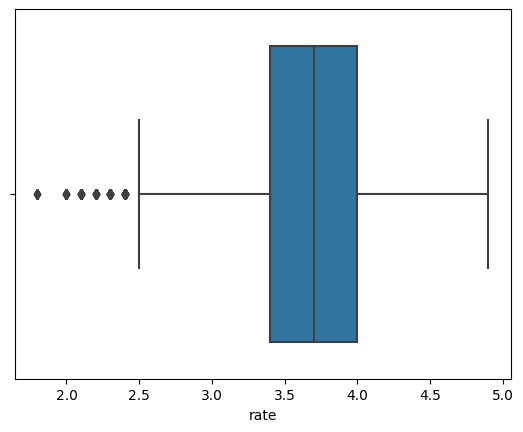

In [15]:
sns.boxplot(x=d.rate)
plt.show()

We can observe from the above box plot that 'rate' has negative outliers and thus, we shall impute its missing values with its median.

In [16]:
d.rate.fillna(d.rate.median(),inplace=True)
d.isna().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

### Checking Duplicate Records

In [17]:
d.duplicated().sum()

19720

There are 19720 duplicate records in the data. Thus, we shall drop them.

In [18]:
d=d.drop_duplicates()
d.duplicated().sum()

0

## Univariate Analysis

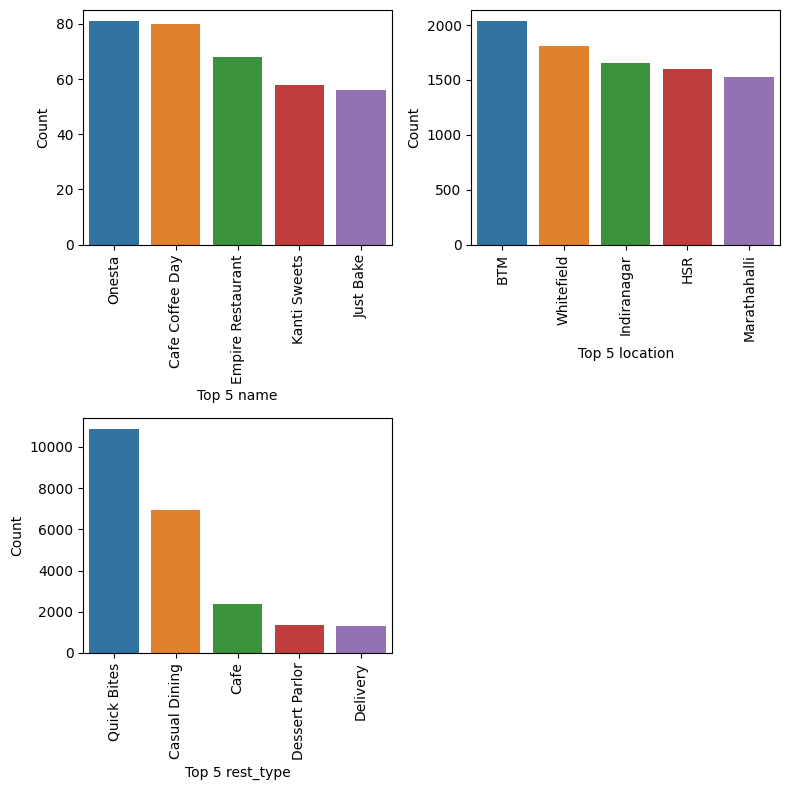

In [19]:
n=1
plt.figure(figsize=(8,8))
for i in ['name','location','rest_type']:
    plt.subplot(2,2,n)
    v=d[i].value_counts()[:5] # selects 5 unique values with highest count
    sns.barplot(x=v.index,y=v.values) # plots bar graph with names of values on x and counts on y
    plt.xticks(rotation=90)
    plt.xlabel(f'Top 5 {i}')
    plt.ylabel('Count')
    n+=1
plt.tight_layout()
plt.show()

**Inferences:**

1. 'Onesta' and 'Cafe Coffee Day' are two of the most common restaurants.
2. BTM has the highest number of restaurants.
3. 'Casual Dining' is the most common type of restaurants after 'Quick Bites'.

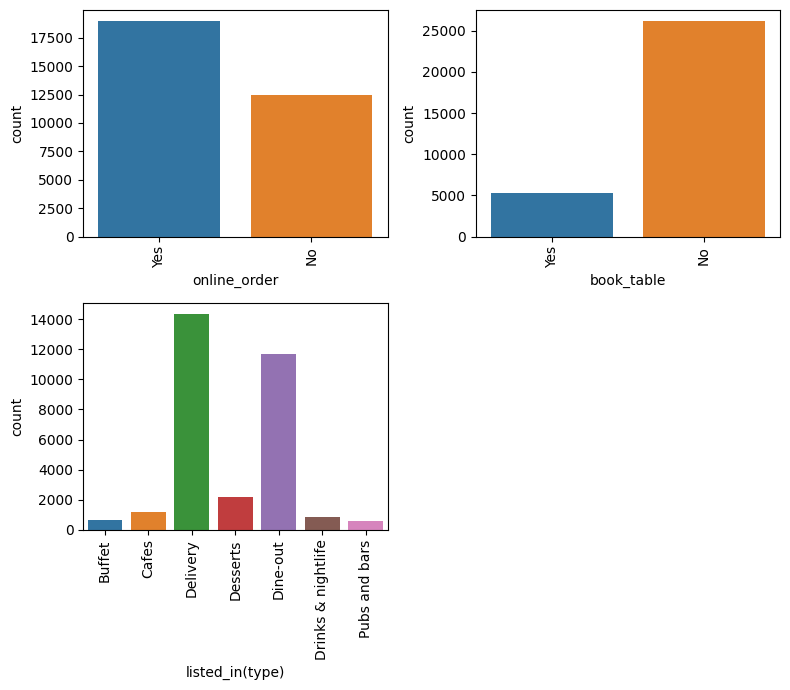

In [20]:
n=1
plt.figure(figsize=(8,7))
for i in ['online_order','book_table','listed_in(type)']:
    plt.subplot(2,2,n)
    sns.countplot(x=d[i])
    plt.xticks(rotation=90)
    n+=1
plt.tight_layout()
plt.show()

**Inferences:**

1. Offline orders are not much less than online orders.
2. 'book_table' is highly imbalanced.
3. Delivery and dine-out type of restaurants are much more than any other type.

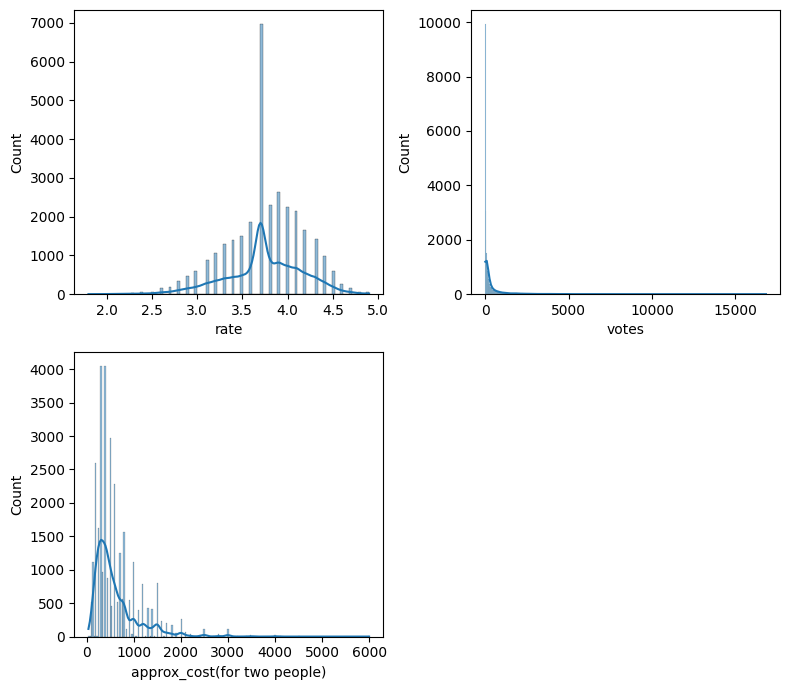

In [21]:
n=1
plt.figure(figsize=(8,7))
for i in ['rate','votes','approx_cost(for two people)']:
    plt.subplot(2,2,n)
    sns.histplot(x=d[i],kde=True)
    n+=1
plt.tight_layout()
plt.show()

**Inferences:**

1. Majority of the restaurants are rated between 3 and 4.5.
2. Restaurants with zero votes are common.
3. Approximate cost for two people does not go beyond 2000 in most of the restaurants.

## Bivariate Analysis

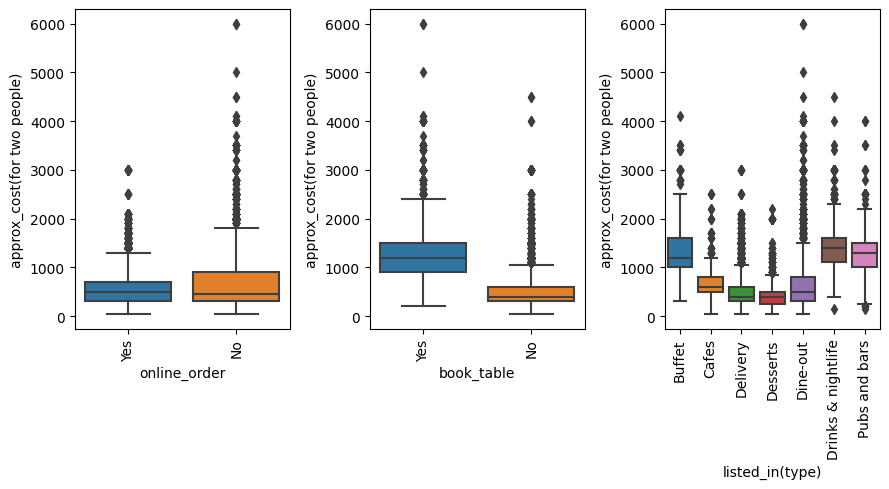

In [22]:
n=1
plt.figure(figsize=(9,5))
for i in ['online_order','book_table','listed_in(type)']:
    plt.subplot(1,3,n)
    sns.boxplot(x=d[i],y=d['approx_cost(for two people)'])
    plt.xticks(rotation=90)
    n+=1
plt.tight_layout()
plt.show()

**Inferences:**

1. Approximate cost does not vary too much depending on whether orders are online or not.
2. Orders with tables booked have higher approximate costs.
3. 'Buffet', 'Drinks & nightlife' and 'Pubs and bars' type of restaurants have higher approximate cost.

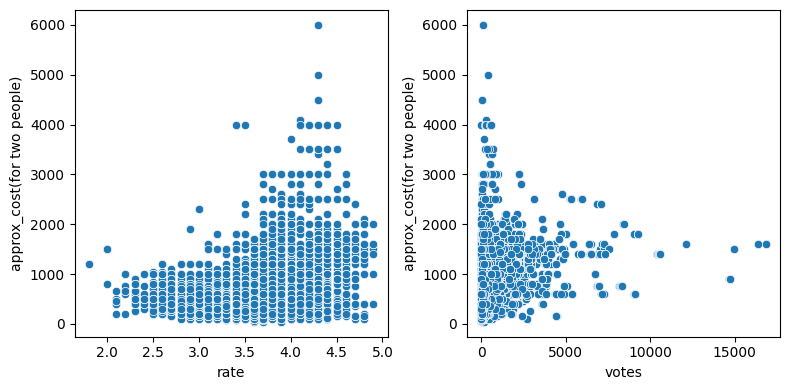

In [23]:
n=1
plt.figure(figsize=(8,4))
for i in ['rate','votes']:
    plt.subplot(1,2,n)
    sns.scatterplot(x=d[i],y=d['approx_cost(for two people)'])
    n+=1
plt.tight_layout()
plt.show()

**Inferences:**

1. Approximate cost is higher for higher rated restaurants.
2. Restaurants in which approximate cost is high have less votes.

Thus, 'book_table', 'listed_in(type)', 'rate' and 'votes' are variables significant for our prediction.

### Outlier Analysis

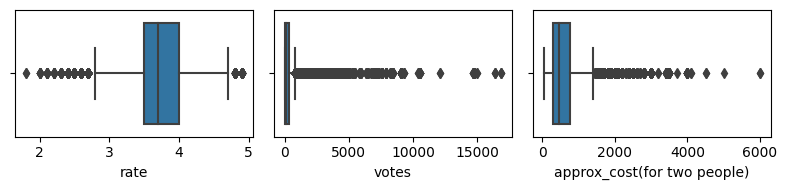

In [24]:
n=1
plt.figure(figsize=(8,2))
for i in ['rate','votes','approx_cost(for two people)']:
    plt.subplot(1,3,n)
    sns.boxplot(x=d[i])
    n+=1
plt.tight_layout()
plt.show()

We see that all the numeric variables have outliers. 'votes' and 'approx_cost(for two people)' have too many outliers and thus we shall keep them unchanged in order to prevent loss of data. We shall cap the outliers of 'rate'.

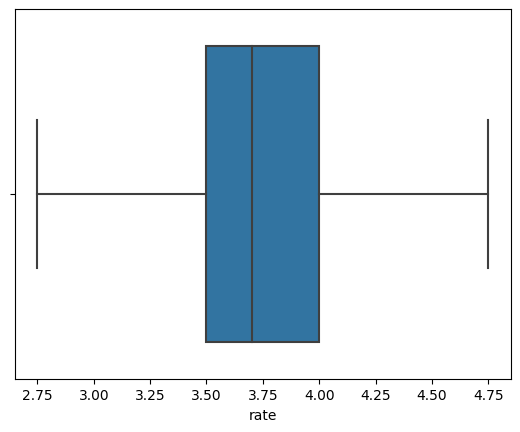

In [25]:
q1=d.rate.quantile(.25)
q3=d.rate.quantile(.75)
iqr=q3-q1
d.rate=np.where(d.rate<q1-1.5*iqr,q1-1.5*iqr,d.rate)
d.rate=np.where(d.rate>q3+1.5*iqr,q3+1.5*iqr,d.rate)
sns.boxplot(x=d.rate)
plt.show()

We shall create a copy of the cleaned data to use in section B.

In [26]:
d_clean=d.copy()

## Hypothesis Testing

**Testing dependence of target variable on 'online_order'**

H0: m1 = m2

H1: m1 != m2

Significance level = 0.05

In [26]:
y=d[d.online_order=='Yes']['approx_cost(for two people)'] 
n=d[d.online_order=='No']['approx_cost(for two people)'] 
print('P-value =',stats.ttest_ind(y,n)[1])

P-value = 5.07755878385213e-83


Since the p-value is much less than the significance level, we reject the null hypothesis. Hence, there is enough evidence to conclude that the mean cost of online orders is different than that of offline orders. 

Thus, the target variable depends on 'online_order'.

**Testing dependence of target variable on 'book_table'**

H0: m1 = m2

H1: m1 != m2

Significance level = 0.05

In [27]:
y=d[d.book_table=='Yes']['approx_cost(for two people)']
n=d[d.book_table=='No']['approx_cost(for two people)']
print('P-value =',stats.ttest_ind(y,n)[1])

P-value = 0.0


Since the p-value is much less than the significance level, we reject the null hypothesis. Hence, there is enough evidence to conclude that the mean cost of orders with tables booked is different than that of orders with no tables booked. 

Thus, the target variable depends on 'book_table'.

**Testing dependence of target variable on 'rate'**

H0: 'rate' and 'approx_cost(for two people)' are independent.

H1: 'rate' and 'approx_cost(for two people)' are not independent.

Significance level = 0.05

In [28]:
print('P-value =',stats.pearsonr(d.rate,d['approx_cost(for two people)'])[1])
# performs Pearson's Test of Correlation

P-value = 0.0


Since the p-value is much less than the significance level, we reject the null hypothesis. Hence, there is enough evidence to conclude that 'rate' and 'approx_cost(for two people)' are not independent. 

Thus, the target variable depends on 'rate'.

**Testing dependence of target variable on 'votes'**

H0: 'votes' and 'approx_cost(for two people)' are independent.

H1: 'votes' and 'approx_cost(for two people)' are not independent.

Significance level = 0.05

In [29]:
print('P-value =',stats.pearsonr(d.votes,d['approx_cost(for two people)'])[1])
# performs Pearson's Test of Correlation

P-value = 0.0


Since the p-value is much less than the significance level, we reject the null hypothesis. Hence, there is enough evidence to conclude that 'votes' and 'approx_cost(for two people)' are not independent. 

Thus, the target variable depends on 'votes'.

### Encoding Categorical Variables

In [30]:
d.name=LabelEncoder().fit_transform(d.name)
d.online_order=d.online_order.map({'Yes':1,'No':0}) # replaces 'Yes' with 1 and 'No' with 0
d.book_table=d.book_table.map({'Yes':1,'No':0}) # replaces 'Yes' with 1 and 'No' with 0
d.location=d.location.map(dict(d.groupby('location')['approx_cost(for two people)'].mean()))
# performs target encoding
d.rest_type=LabelEncoder().fit_transform(d.rest_type)
d['listed_in(type)']=d['listed_in(type)'].map(dict(d.groupby('listed_in(type)')
                                                   ['approx_cost(for two people)'].mean()))
# performs target encoding
d.head()

,name,online_order,book_table,rate,votes,location,rest_type,approx_cost(for two people),listed_in(type)
0,3664,1,1,4.1,775,426.125000,27,800.0,1338.467742
1,6969,1,0,4.1,787,426.125000,27,800.0,1338.467742
2,6450,1,0,3.8,918,426.125000,22,800.0,1338.467742
3,198,0,0,3.7,88,426.125000,78,300.0,1338.467742
4,2919,0,0,3.8,166,346.759907,27,600.0,1338.467742


### Splitting Data into Train and Test Sets

In [31]:
x=d.drop('approx_cost(for two people)',axis=1)
y=d['approx_cost(for two people)']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.3,random_state=1)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(22012, 8) (9435, 8) (22012,) (9435,)


### Base Model

In [32]:
o=OLS(ytrain,add_constant(xtrain)).fit()
o.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     approx_cost(for two people)   R-squared:                       0.560
Model:                                     OLS   Adj. R-squared:                  0.560
Method:                          Least Squares   F-statistic:                     3499.
Date:                         Wed, 10 May 2023   Prob (F-statistic):               0.00
Time:                                 16:55:35   Log-Likelihood:            -1.5766e+05
No. Observations:                        22012   AIC:                         3.153e+05
Df Residuals:                            22003   BIC:                         3.154e+05
Df Model:                                    8                                         
Covariance Type:                     nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -217.6451     24.771     -8.786      0.000    -266.198    -169.093
name                0.0038      0.001      4.574      0.000       0.002       0.005
online_order      -43.3750      4.415     -9.825      0.000     -52.028     -34.722
book_table        487.3829      6.945     70.182      0.000     473.771     500.995
rate               81.0170      6.286     12.889      0.000      68.697      93.337
votes               0.0371      0.003     14.840      0.000       0.032       0.042
location            0.4670      0.011     43.465      0.000       0.446       0.488
rest_type          -2.6366      0.081    -32.608      0.000      -2.795      -2.478
listed_in(type)     0.4660      0.011     43.695      0.000       0.445       0.487
==============================================================================
Omnibus:                    13443.165   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           306105.588
Skew:                           2.530   Prob(JB):                         0.00
Kurtosis:                      20.554   Cond. No.                     6.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Inferences:**

1. The R2 of the model tells us that it explains 56% variation in the target variable.
2. The adjusted R2 is equal to the R2 and thus there is little to no noise in the data.
3. The p-value of F-statistic is much less than 0.05 and thus, the model is significant for the prediction.
4. P-values of all the variables are less than 0.05 and thus, they are significant for the prediction.
5. The Durbin-Watson number is very close to 2, which means that there is no autocorrelation of errors present.
6. The p-value of Jarque-Bera is much less than 0.05 and thus, the residuals are not normally distributed.

We shall try to increase the R2 in the final model as it is relatively low.

### Final Model (Random Forest)

In [47]:
r=RandomForestRegressor(max_depth=5,random_state=1).fit(xtrain,ytrain) 
# fits Random Forest model with max depth 5
pred=r.predict(xtrain)
print('R2 for train set =',r2_score(ytrain,pred))

R2 for train set = 0.7309290144385832


We can see that the R2 of the model has increased to 0.73 which tells us that the model explains 73% variation in the target variable. Thus, the model is performing fairly good. We shall now perform the prediction on the test set.

In [48]:
pred=r.predict(xtest)
print('R2 for test set =',r2_score(ytest,pred))

R2 for test set = 0.7340438317042379


### Business Understanding

1. Restaurants should try to promote online orders as much as possible by advertising their online services and providing discounts.
2. Invest in abundant seating so that customers do not feel the need of booking tables.
3. Enable delivery option and provide more variety in desserts and dining food items.

-------------

# Section B: Classification 

**Problem Statement:**

The model that you built in the above case study has gone to deployment and Zomato has 
been impressed with your data analysis and Zomoto has been believing that your analysis 
going to be impactful. Now Zomato has been observing the orders happening online and 
offline, Due to offline orders, Zomato is not able to attract customers with diverse items and 
offers, and the user subscription also getting low. so it has decided to give you the project 
on the same. Now the problem statement is that Zomato wants to know whether the 
customer would order the orders online or offline so that Zomato can take further 
strategies to improve the online order.

**Objective:**

The Aim is to classify the orders that have been ordered online and offline. And 
identify the patterns that lead to orders online orders as well as offline. Your model should 
be able to classify the classes effectively.

#### Metrics

Since this is a classification problem, the metrics we can use for model performance are:

1. Confusion matrix
2. Cross entropy
3. Reciever Operating Characteristics (ROC) Curve

We shall use the copy of the cleaned data from Section A.

In [27]:
d=d_clean.copy()
d.head()

,name,online_order,book_table,rate,votes,location,rest_type,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,600.0,Buffet


### Analysing the Target Variable

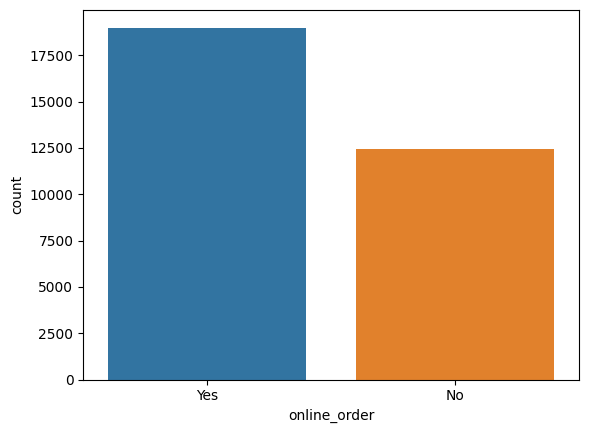

In [28]:
sns.countplot(x=d.online_order)
plt.show()

We can see that there are more records of online orders in the data than offline which slightly imabalances the target variable. However, it is not too imbalanced and thus, we can continue with our analysis without making any changes.

## Bivariate Analysis

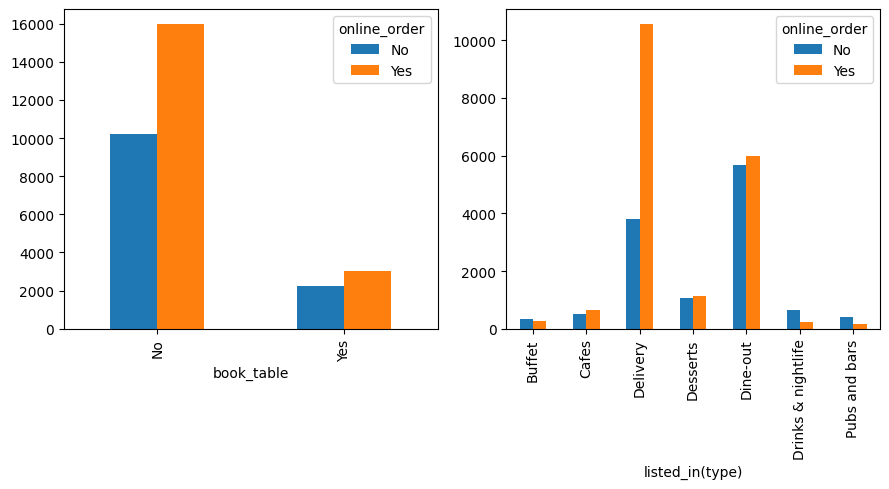

In [29]:
n=1
plt.figure(figsize=(9,5))
for i in ['book_table','listed_in(type)']:
    ax=plt.subplot(1,2,n) # selects axes for a subplot
    pd.crosstab(d[i],d.online_order).plot.bar(ax=ax) # plots a grouped bar chart on the selected axes
    plt.xticks(rotation=90)
    n+=1
plt.tight_layout()
plt.show()

**Inferences:**

1. Proportion of online orders is roughly the same irrespective of table booking.
2. Online orders are more than double the offline orders in delivery type restaurants. 
3. 'Buffet', 'Drinks & nightlife' and 'Pubs and bars' type of restaurants have more offline orders than online.

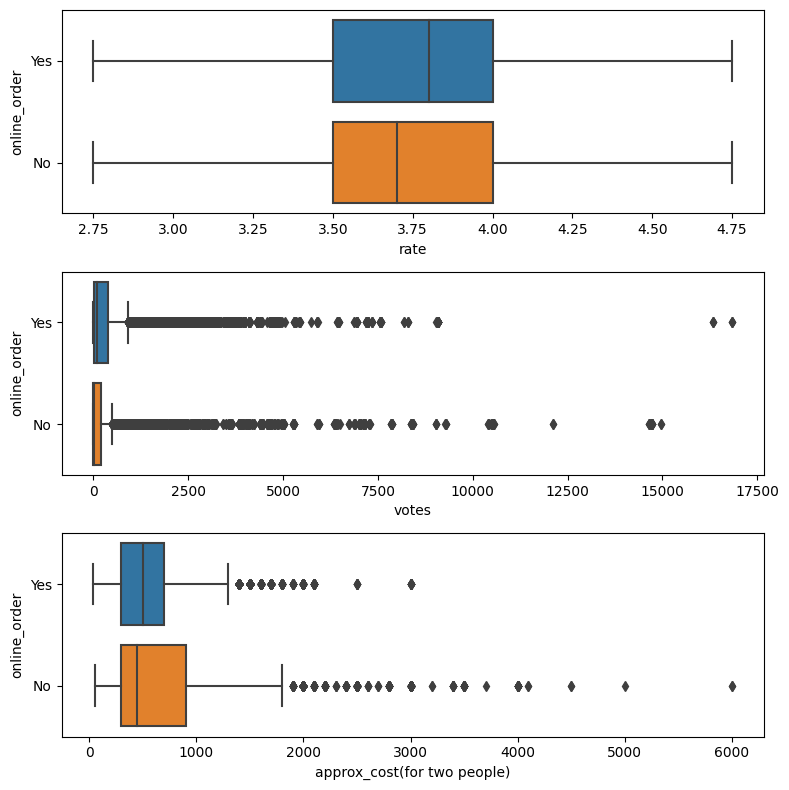

In [30]:
n=1
plt.figure(figsize=(8,8))
for i in ['rate','votes','approx_cost(for two people)']:
    plt.subplot(3,1,n)
    sns.boxplot(x=d[i],y=d.online_order)
    n+=1
plt.tight_layout()
plt.show()

**Inferences:**

1. Ratings of restaurants do not vary much depending on type of orders.
2. Similarly, number of restaurant votes does not depend on type of orders.
3. Approximate cost does not vary too much depending on whether orders are online or not.

## Clustering

In [31]:
d_num=d.select_dtypes('number') # selects all numeric variables
d_num.head()

,rate,votes,approx_cost(for two people)
0,4.1,775,800.0
1,4.1,787,800.0
2,3.8,918,800.0
3,3.7,88,300.0
4,3.8,166,600.0


#### Scaling Numeric Data

In [32]:
d_norm=d_num.apply(lambda x:(x-x.mean())/x.std()) # performs standard scaling
d_norm.head()

,rate,votes,approx_cost(for two people)
0,0.856554,0.388967,0.409882
1,0.856554,0.401171,0.409882
2,0.120596,0.534403,0.409882
3,-0.124723,-0.309737,-0.649301
4,0.120596,-0.230408,-0.013791


#### Elbow Plot

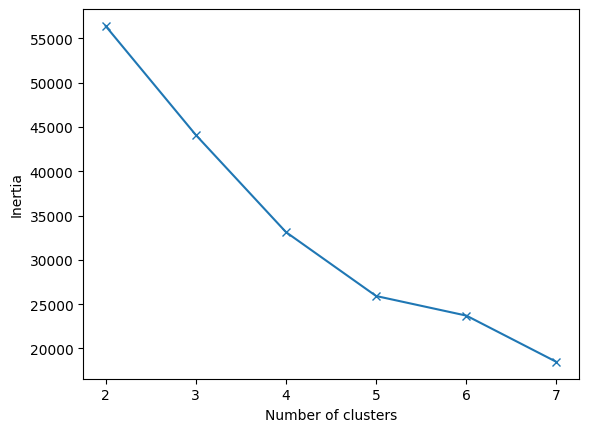

In [33]:
w=[]
for i in range(2,8):
    k=KMeans(i,n_init='auto',random_state=1).fit(d_norm) # fits K-Means model with n_init = 'auto'
    w+=[k.inertia_]
plt.plot(range(2,8),w,'x-') # plots line graph of number of clusters against inertia
plt.xticks(range(2,8)) # sets x-axis ticks
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

We can see that the elbow point in the plot of inertia against number of clusters corresponds to number of clusters = 5. Thus, we shall take the optimal number of clusters as 5 and perform the clustering.

In [34]:
k=KMeans(5,n_init='auto',random_state=1).fit(d_norm)
d['cluster']=k.labels_
d.head()

,name,online_order,book_table,rate,votes,location,rest_type,approx_cost(for two people),listed_in(type),cluster
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,800.0,Buffet,1
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,800.0,Buffet,1
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining",800.0,Buffet,1
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,300.0,Buffet,0
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,600.0,Buffet,0


### Interpreting the Clusters

In [35]:
d[d.cluster==0].describe()

,rate,votes,approx_cost(for two people),cluster
count,14883.000000,14883.000000,14883.00000,14883.0
mean,3.730740,71.943358,386.47645,0.0
std,0.139017,115.755435,183.97463,0.0
min,3.500000,0.000000,40.00000,0.0
25%,3.700000,0.000000,250.00000,0.0
50%,3.700000,28.000000,350.00000,0.0
75%,3.800000,90.000000,500.00000,0.0
max,4.200000,1218.000000,1300.00000,0.0


We see that cluster 0 has orders from medium rated, less voted and low-cost restaurants.

In [36]:
d[d.cluster==1].describe()

,rate,votes,approx_cost(for two people),cluster
count,6384.000000,6384.000000,6384.000000,6384.0
mean,4.133960,631.610119,729.738409,1.0
std,0.192403,593.456343,255.426846,0.0
min,3.500000,0.000000,100.000000,1.0
25%,4.000000,202.000000,500.000000,1.0
50%,4.100000,447.000000,750.000000,1.0
75%,4.300000,845.500000,900.000000,1.0
max,4.750000,3128.000000,1300.000000,1.0


We see that cluster 1 has orders from high rated, slightly less voted and medium-cost restaurants.

In [37]:
d[d.cluster==2].describe()

,rate,votes,approx_cost(for two people),cluster
count,756.000000,756.000000,756.000000,756.0
mean,4.444643,5208.646825,1280.952381,2.0
std,0.214139,2515.274201,468.442133,0.0
min,3.700000,2921.000000,150.000000,2.0
25%,4.300000,3616.250000,900.000000,2.0
50%,4.500000,4410.000000,1400.000000,2.0
75%,4.600000,6052.500000,1600.000000,2.0
max,4.750000,16832.000000,2600.000000,2.0


We see that cluster 2 has orders from high rated, high voted and slightly high-cost restaurants.

In [38]:
d[d.cluster==3].describe()

,rate,votes,approx_cost(for two people),cluster
count,2887.000000,2887.000000,2887.00000,2887.0
mean,4.180585,995.151022,1690.66505,3.0
std,0.263196,811.587835,542.86014,0.0
min,3.000000,0.000000,1100.00000,3.0
25%,4.000000,276.500000,1400.00000,3.0
50%,4.200000,771.000000,1500.00000,3.0
75%,4.400000,1561.500000,1800.00000,3.0
max,4.750000,3140.000000,6000.00000,3.0


We see that cluster 3 has orders from high rated, medium voted and very high-cost restaurants.

In [39]:
d[d.cluster==4].describe()

,rate,votes,approx_cost(for two people),cluster
count,6537.000000,6537.000000,6537.000000,6537.0
mean,3.152425,65.903014,430.319566,4.0
std,0.209073,124.107633,219.012993,0.0
min,2.750000,0.000000,70.000000,4.0
25%,3.000000,7.000000,300.000000,4.0
50%,3.200000,18.000000,400.000000,4.0
75%,3.300000,66.000000,500.000000,4.0
max,3.400000,1884.000000,1900.000000,4.0


We see that cluster 4 has orders from lowest rated, least voted and low-cost restaurants.

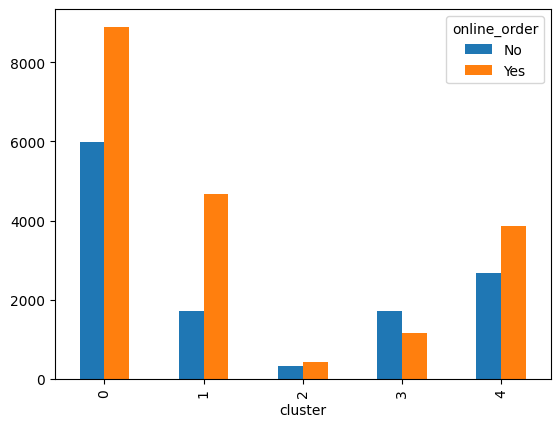

In [40]:
pd.crosstab(d.cluster,d.online_order).plot.bar() 
# plots grouped bar chart of 'cluster' and 'online_order'
plt.show()

**Inferences:**

1. Except cluster 2 and 3, all other clusters have high number of online orders.
2. Cluster 3 has more offline orders than online.

Thus, 'listed_in(type)' and 'cluster' impact our target variable.

## Hypothesis Testing

**Test of dependence of target variable on 'listed_in(type)'**

H0: 'listed_in(type)' and 'online_order' are independent.

H1: 'listed_in(type)' and 'online_order' are not independent.

Significance level = 0.05

In [41]:
print('P-value =',stats.chi2_contingency(pd.crosstab(d['listed_in(type)'],d.online_order))[1])
# Performs Chi-square Test of Independence

P-value = 0.0


Since the p-value is much less than the significance level, we reject the null hypothesis. Hence, there is enough evidence to conclude that 'listed_in(type)' and 'online_order' are not independent.

Thus, the target variable depends on 'listed_in(type)'.

**Test of dependence of target variable on 'cluster'**

H0: 'cluster' and 'online_order' are independent.

H1: 'cluster' and 'online_order' are not independent.

Significance level = 0.05

In [42]:
print('P-value =',stats.chi2_contingency(pd.crosstab(d.cluster,d.online_order))[1])
# Performs Chi-square Test of Independence

P-value = 7.58412277146681e-200


Since the p-value is much less than the significance level, we reject the null hypothesis. Hence, there is enough evidence to conclude that 'cluster' and 'online_order' are not independent.

Thus, the target variable depends on 'cluster'.

### Encoding Categorical Variables

In [43]:
d.name=LabelEncoder().fit_transform(d.name)
d.online_order=d.online_order.map({'Yes':1,'No':0}) # replaces 'Yes' with 1 and 'No' with 0
d.book_table=d.book_table.map({'Yes':1,'No':0}) # replaces 'Yes' with 1 and 'No' with 0
d.location=LabelEncoder().fit_transform(d.location)
d.rest_type=LabelEncoder().fit_transform(d.rest_type)
d['listed_in(type)']=d['listed_in(type)'].map(dict(d.groupby('listed_in(type)').online_order.mean()))
# performs target encoding
d.head()

,name,online_order,book_table,rate,votes,location,rest_type,approx_cost(for two people),listed_in(type),cluster
0,3664,1,1,4.1,775,1,27,800.0,0.432258,1
1,6969,1,0,4.1,787,1,27,800.0,0.432258,1
2,6450,1,0,3.8,918,1,22,800.0,0.432258,1
3,198,0,0,3.7,88,1,78,300.0,0.432258,0
4,2919,0,0,3.8,166,4,27,600.0,0.432258,0


### Splitting Data into Train and Test Sets

In [44]:
x=d.drop('online_order',axis=1)
y=d.online_order
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.3,random_state=1)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(22012, 9) (9435, 9) (22012,) (9435,)


### Base Model

In [45]:
lr=LogisticRegression().fit(xtrain,ytrain)
pred=lr.predict(xtrain)
print(classification_report(ytrain,pred))

              precision    recall  f1-score   support

           0       0.72      0.12      0.21      8748
           1       0.63      0.97      0.76     13264

    accuracy                           0.63     22012
   macro avg       0.67      0.55      0.48     22012
weighted avg       0.66      0.63      0.54     22012



**Inferences:**

1. The model correctly predicts the classes of 63% of the data.
2. It performs fairly well in precision of both the positive and negative classes.

We can see that the recall and F1 score of the model is quite low for the negative class due to the slight imbalance in the target variable. We shall try to improve them by trying other models.

### Logit Model

In [55]:
l=Logit(ytrain,add_constant(xtrain)).fit()
prob=l.predict(add_constant(xtrain)) # predicts probabilities of positive class
pred=prob.apply(lambda x:0 if x<.5 else 1) # assigns classes according to predicted probabilities
print(classification_report(ytrain,pred))
l.summary()

Optimization terminated successfully.
         Current function value: 0.626591
         Iterations 5
              precision    recall  f1-score   support

           0       0.58      0.40      0.47      8748
           1       0.67      0.81      0.73     13264

    accuracy                           0.64     22012
   macro avg       0.62      0.60      0.60     22012
weighted avg       0.63      0.64      0.63     22012



<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           online_order   No. Observations:                22012
Model:                          Logit   Df Residuals:                    22002
Method:                           MLE   Df Model:                            9
Date:                Fri, 12 May 2023   Pseudo R-squ.:                 0.06751
Time:                        06:13:33   Log-Likelihood:                -13793.
converged:                       True   LL-Null:                       -14791.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -4.1529      0.233    -17.832      0.000      -4.609      -3.696
name                         1.787e-05   5.68e-06      3.146      0.002    6.74e-06     2.9e-05
book_table                      0.3261      0.055      5.964      0.000       0.219       0.433
rate                            0.6449      0.057     11.286      0.000       0.533       0.757
votes                        4.994e-05   1.88e-05      2.653      0.008     1.3e-05    8.68e-05
location                       -0.0021      0.001     -4.033      0.000      -0.003      -0.001
rest_type                      -0.0047      0.001     -8.339      0.000      -0.006      -0.004
approx_cost(for two people)    -0.0007   4.91e-05    -13.396      0.000      -0.001      -0.001
listed_in(type)                 4.3878      0.121     36.203      0.000       4.150       4.625
cluster                         0.0707      0.012      5.760      0.000       0.047       0.095
===============================================================================================
"""

The recall and F1 score have improved. We shall try to find the optimal probability threshold using Youden's Table.

#### Youden's Table

In [47]:
fpr,tpr,th=roc_curve(ytrain,prob)
yt=pd.DataFrame({'TPR-FPR':tpr-fpr,'Threshold':th}) # creates Youden's Table
yt.nlargest(5,'TPR-FPR') # returns records of Youden's Table with top five 'TPR-FPR'

,TPR-FPR,Threshold
4582,0.251758,0.587750
4584,0.251719,0.587666
4583,0.251644,0.587743
4590,0.251598,0.587226
4580,0.251571,0.587925


We see that the threshold for the maximum difference between True Positive Rate (TPR) and False Positive Rate (FPR) is 0.58775 and thus, we shall take it as the optimal threshold.

In [48]:
pred=prob.apply(lambda x:0 if x<0.58775 else 1) # assigns classes according to predicted probabilities
print(classification_report(ytrain,pred))

              precision    recall  f1-score   support

           0       0.53      0.61      0.57      8748
           1       0.71      0.64      0.68     13264

    accuracy                           0.63     22012
   macro avg       0.62      0.63      0.62     22012
weighted avg       0.64      0.63      0.63     22012



### K-Nearest Neighbors (KNN) Model

We shall scale the independent columns and re-split the data for K-Nearest Neighbors (KNN) algorithm.

In [49]:
x_scale=x.apply(lambda x:(x-x.mean())/x.std()) # performs standard scaling
xtrain_scale,xtest_scale,ytrain,ytest=train_test_split(x,y,test_size=.3,random_state=1)
print(xtrain_scale.shape,xtest_scale.shape,ytrain.shape,ytest.shape)

(22012, 9) (9435, 9) (22012,) (9435,)


In [50]:
knn=KNeighborsClassifier(73,metric='euclidean').fit(xtrain_scale,ytrain)
pred=knn.predict(xtrain_scale)
print(classification_report(ytrain,pred))

              precision    recall  f1-score   support

           0       0.65      0.43      0.52      8748
           1       0.69      0.85      0.76     13264

    accuracy                           0.68     22012
   macro avg       0.67      0.64      0.64     22012
weighted avg       0.68      0.68      0.67     22012



### Naive Bayes Model

In [51]:
gnb=GaussianNB().fit(xtrain,ytrain)
pred=gnb.predict(xtrain)
print(classification_report(ytrain,pred))

              precision    recall  f1-score   support

           0       0.58      0.21      0.31      8748
           1       0.63      0.90      0.74     13264

    accuracy                           0.63     22012
   macro avg       0.61      0.56      0.53     22012
weighted avg       0.61      0.63      0.57     22012



### Decision Tree Model

In [52]:
dt=DecisionTreeClassifier(max_depth=4,random_state=1).fit(xtrain,ytrain) 
pred=dt.predict(xtrain)
print(classification_report(ytrain,pred))

              precision    recall  f1-score   support

           0       0.65      0.64      0.65      8748
           1       0.77      0.78      0.77     13264

    accuracy                           0.72     22012
   macro avg       0.71      0.71      0.71     22012
weighted avg       0.72      0.72      0.72     22012



### Final Model (Random Forest)

In [53]:
rf=RandomForestClassifier(max_depth=5,random_state=1).fit(xtrain,ytrain)
pred=rf.predict(xtrain)
print('Classification report for train set:\n\n',classification_report(ytrain,pred))

Classification report for train set:

               precision    recall  f1-score   support

           0       0.70      0.59      0.64      8748
           1       0.75      0.83      0.79     13264

    accuracy                           0.74     22012
   macro avg       0.73      0.71      0.71     22012
weighted avg       0.73      0.74      0.73     22012



**Inferences:**

1. The model correctly predicts the classes of 74% of the data.
2. Other metrics such as precision and F1 score are also fairly well for both the positive and negative classes.
3. There is significant difference between recall of negative and positive classes with tells us that the model is better at predicting positive classes than negative because of imbalance in the target.

We can see that the Random Forest model is better than the previous models in terms of most of the metrics and thus, we have decided to choose it as our final model. We shall now perform the prediction on the test set.

In [54]:
pred=rf.predict(xtest)
print('Classification report for test set:\n\n',classification_report(ytest,pred))

Classification report for test set:

               precision    recall  f1-score   support

           0       0.70      0.59      0.64      3701
           1       0.76      0.83      0.79      5734

    accuracy                           0.74      9435
   macro avg       0.73      0.71      0.72      9435
weighted avg       0.73      0.74      0.73      9435



### Business Understanding

1. If a customer wants to book tables, the order is more likely to be online than offline.
2. Higher rated restaurants have a higher chance of online order.
3. Orders from delivery type restaurants are much more likely to be online than other types.
4. Buffet restaurants, pubs and bars generally have a higher chance of offline orders than online.